# Исследование стоимости фиксированного набора потребительских товаров и услуг #

## Введение ##

Цель проводимого исследования – анализ временного ряда стоимости фиксированного набора потребительских товаров и услуг

## 1. Подбор данных для анализа ##

### 1.1 Временной ряд №1 - XXX ###

XXX – стоимость фиксированного набора потребительских товаров
и услуг; данные представлены в абсолютных значениях в рублях [рубль].
Источник: https://fedstat.ru/indicator/31052.

### 1.11 Описательная статистика ###

In [1]:
import pandas as pd

In [5]:
df = pd.read_excel('data/data_for_regression.xlsx')

Общее представление данных

In [6]:
df.head(5)

,Time,XXX,RU$,$EUR,PURAN,EXOIL,PCRUD,PGAS,POIL,EENER,EMP
0,2007-01-01,5421.20,26.4749,1.2993,72.000000,7436936.1,2897847.4,8.39,54.51,54252.2,140.7
1,2007-02-01,5545.49,26.3351,1.3080,76.250000,7390391.7,3357998.3,8.39,59.28,51353.3,141.7
2,2007-03-01,5585.18,26.1108,1.3246,89.444444,8554919.9,3703923.1,8.39,60.44,41097.4,142.8
3,2007-04-01,5616.06,25.8420,1.3513,110.428571,9231511.7,3881172.3,7.83,63.98,39703.4,143.8
4,2007-05-01,5663.76,25.8183,1.3518,119.111111,10511501.1,4027477.9,7.83,63.46,40899.9,144.0


Размер данных

In [7]:
df.shape

(151, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    151 non-null    datetime64[ns]
 1   XXX     151 non-null    float64       
 2   RU$     151 non-null    float64       
 3   $EUR    151 non-null    float64       
 4   PURAN   151 non-null    float64       
 5   EXOIL   151 non-null    float64       
 6   PCRUD   151 non-null    float64       
 7   PGAS    151 non-null    float64       
 8   POIL    151 non-null    float64       
 9   EENER   151 non-null    float64       
 10  EMP     151 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 13.1 KB


### 1.12 Визуализация данных ###

Карта распределния регрессоров

In [10]:
import seaborn as sns
name = list(df)
name = name[1:]

Построение временных рядов

In [13]:
# Using plotly.express
import plotly.express as px

fig = px.line(df, x='Time', y=name[0])
fig.show()

## 2. SARIMA ##

### 2.1 Коррелограмма ##

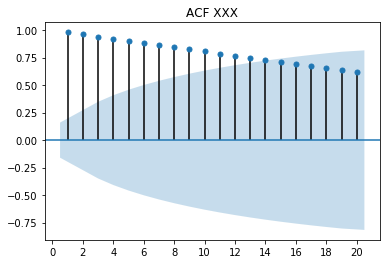

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

n_lags = 20
lags = np.arange(1, n_lags+1)
lags

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.XXX, lags=lags, title = 'ACF XXX')
plt.xticks(np.arange(0, n_lags+1,2))
plt.show()

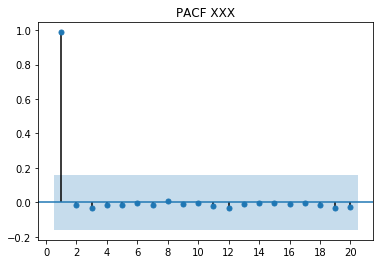

In [22]:
plot_pacf(df.XXX, lags=lags, title = 'PACF XXX')
plt.xticks(np.arange(0, n_lags+1,2))
plt.show()

Так как на коррелограмме ряда первая автокорреляция приближается к единице, то приводим коррелограмму для временного ряда первой разности

In [23]:
df['XXX_dif'] = df['XXX']
df['XXX_dif'] = df.XXX_dif - df.XXX_dif.shift(1)
df.head(5)

,Time,XXX,RU$,$EUR,PURAN,EXOIL,PCRUD,PGAS,POIL,EENER,EMP,XXX_dif
0,2007-01-01,5421.20,26.4749,1.2993,72.000000,7436936.1,2897847.4,8.39,54.51,54252.2,140.7,NaN
1,2007-02-01,5545.49,26.3351,1.3080,76.250000,7390391.7,3357998.3,8.39,59.28,51353.3,141.7,124.29
2,2007-03-01,5585.18,26.1108,1.3246,89.444444,8554919.9,3703923.1,8.39,60.44,41097.4,142.8,39.69
3,2007-04-01,5616.06,25.8420,1.3513,110.428571,9231511.7,3881172.3,7.83,63.98,39703.4,143.8,30.88
4,2007-05-01,5663.76,25.8183,1.3518,119.111111,10511501.1,4027477.9,7.83,63.46,40899.9,144.0,47.70


In [26]:
df_without_1 = df.XXX_dif
df_without_1[:5]

0       NaN
1    124.29
2     39.69
3     30.88
4     47.70
Name: XXX_dif, dtype: float64

In [29]:
df_without_1 = df_without_1.drop(df_without_1.index[[0]])
df_without_1[:5]

1    124.29
2     39.69
3     30.88
4     47.70
5     71.71
Name: XXX_dif, dtype: float64

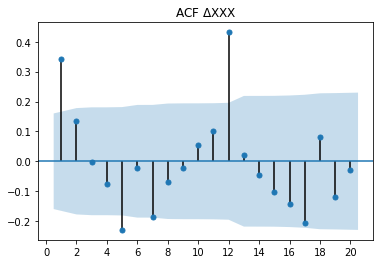

In [30]:
plot_acf(df_without_1, lags=lags, title = 'ACF $\Delta$XXX')
plt.xticks(np.arange(0, n_lags+1,2))
plt.show()

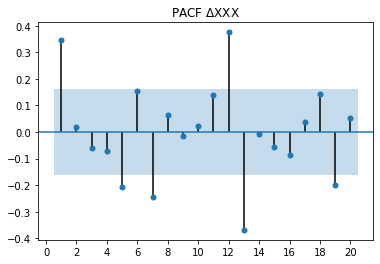

In [31]:
plot_pacf(df_without_1, lags=lags, title = 'PACF $\Delta$XXX')
plt.xticks(np.arange(0, n_lags+1,2))
plt.show()

У данного временного ряда присутствует сезонная составляющая и есть подозрение на наличие единичного корня (стохастического тренда)

### 2.2 тест Дики-Фуллера ##

In [34]:
from statsmodels.tsa.stattools import adfuller

Тест без константы

In [36]:
adfuller(df.XXX, regression = 'nc')

(2.1034259935048465,
 0.9927707133720458,
 13,
 137,
 {'1%': -2.5822529522084285,
  '5%': -1.9431277262981785,
  '10%': -1.6150160499394677},
 1528.411814580231)

Тест "Без константы". Нулевая гипотеза - есть единичный корень. t-стат = 2,1034, P-значение = 0,992. Значит нулевая гипотеза не отвергается на всех стандартных уровнях значимости, единичный корень присутствует.

Тест с константой

In [39]:
adfuller(df.XXX, regression = 'c')

(-0.12655161538045573,
 0.9467288276263299,
 13,
 137,
 {'1%': -3.479007355368944,
  '5%': -2.8828782366015093,
  '10%': -2.5781488587564603},
 1527.1037226791766)

Тест "с константой". Нулевая гипотеза - есть единичный корень. tкр(10%) = -2,57 t-стат = -0,126552. P-значение = 0,9448.

Значит нулевая гипотеза не отвергается на всех стандартных уровнях значимости, единичный корень присутствует.

Тест "с константой и трендом"

In [42]:
adfuller(df.XXX, regression = 'ct')

(-2.052620350155269,
 0.5725041257376007,
 13,
 137,
 {'1%': -4.026417819999821,
  '5%': -3.4430357934402624,
  '10%': -3.1461408177134764},
 1524.2266270464881)

Тест "с константой и трендом". Нулевая гипотеза - есть единичный корень. t-стат = -2,05262. P-значение = 0,5717. Значит нулевая гипотеза не отвергается на всех стандартных уровнях значимости, единичный корень присутствует.

Тест "с константой, трендом и квадратичным трендом"

In [44]:
adfuller(df.XXX, regression = 'ctt')

(-1.9975011000368545,
 0.8176948400021085,
 13,
 137,
 {'1%': -4.4577537252528145,
  '5%': -3.8762087589568606,
  '10%': -3.5802791344401177},
 1526.0942320958288)

Тест "с константой, трендом и квадратичным трендом". Нулевая гипотеза - есть единичный корень. t-стат = -1,9975. P-значение = 0,818. Значит нулевая гипотеза не отвергается на всех стандартных уровнях значимости, единичный корень присутствует.

Стоит отметить минимальное P-значение в тесте "С константой и трендом". Значит делаем вывод о присутствии детерминированного тренда

### 2.3 Выбор параметров и построение модели ARIMA ##